<a href="https://colab.research.google.com/github/krishbhowmick/Machine_Learning/blob/master/01_LinearRegression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

In [ ]:
# Import Data

path = '/content/drive/My Drive/IITB_ML/IITB_ML_Data/insurance.csv'  # ADD path/to/dataset

data = pd.read_csv(path)      # Convert the data to a Pandas data frame
data.shape                    # Shape of the data

(1338, 7)

In [ ]:
data.head()                    # Print the first 5 rows of Dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.describe(include='all')    # Describe all including cound, ... ... ...

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
temp = pd.DataFrame(index=data.columns)       # DataFrame
temp['data_type'] = data.dtypes               # Show data type
temp['null_count'] = data.isnull().sum()      # Count null
temp['unique_count'] = data.nunique()         # count unique
temp

,data_type,null_count,unique_count
age,int64,0,47
sex,object,0,2
bmi,float64,0,548
children,int64,0,6
smoker,object,0,2
region,object,0,4
charges,float64,0,1337


In [ ]:
data['region'].value_counts()                  ## Indivisual_Value_Count (Region)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
data['region'].value_counts()/len(data)*100    ## Percentage of Indivisual_Value_Count (Region)

southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64

In [ ]:
data['smoker'].value_counts()/len(data)*100    ## Percentage of Indivisual_Value_Count (Region)

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

In [ ]:
data['children'].value_counts()/len(data)*100  ## Percentage of Indivisual_Value_Count (Region)

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

In [ ]:
data['sex'].value_counts()/len(data)*100      ## Percentage of Indivisual_Value_Count (Region)

male      50.523169
female    49.476831
Name: sex, dtype: float64

In [ ]:
temp = ['age','sex','bmi','children','smoker','region','charges']
for i in temp:
    print('************ Value Count in', i, '************')
    print(data[i].value_counts())
    print('')

************ Value Count in age ************
18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

************ Value Count in sex ************
male      676
female    662
Name: sex, dtype: int64

************ Value Count in bmi ************
32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64

************ Value Count in children ************
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

************ Value Count in smoker ************
n

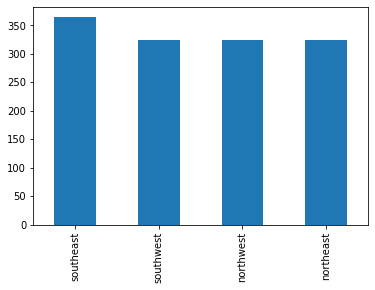

In [ ]:
data['region'].value_counts().plot(kind = 'bar')   ## Indivisual_Value_Count in bar plot (Region)

Text(0.5, 0, 'age')

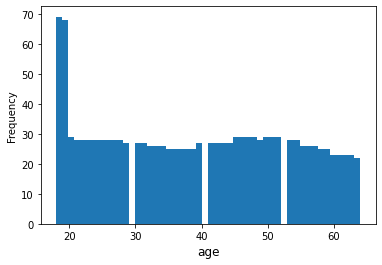

In [ ]:
data['age'].plot.hist(bins = 50)
plt.xlabel('age', fontsize=12)               # Histogram plot of a single variable (age)

In [ ]:
#(data['age'].loc[data['age']<60]).plot.hist(bins=50)

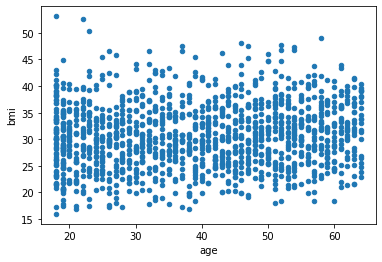

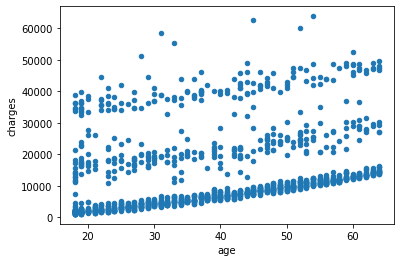

In [ ]:
data.plot.scatter('age','bmi')
data.plot.scatter('age','charges')

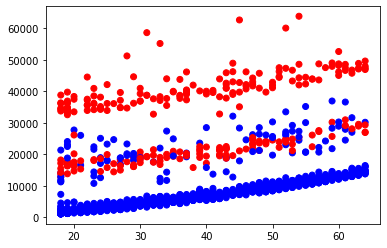

In [ ]:
#subplots   (Smoker vs [age vs charge])

fig, ax = plt.subplots()
colors = {'yes':'red', 'no':'blue'}
ax.scatter(data['age'], data['charges'], c=data['smoker'].apply(lambda x: colors[x]))
plt.show() #'age','sex','bmi','children','smoker','region','charges'

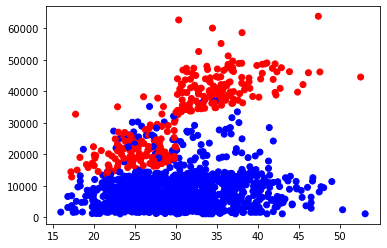

In [ ]:
#  (smoker vs [bmi vs charge])  relation-------got

fig, ax = plt.subplots()
colors = {'yes':'red', 'no':'blue'}
ax.scatter(data['bmi'], data['charges'], c=data['smoker'].apply(lambda x: colors[x]))
plt.show() #'age','sex','bmi','children','smoker','region','charges'

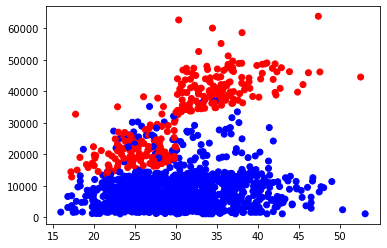

In [ ]:
#  (Sex vs [age vs charge]) no relation
#  (smoker vs [sex vs charge]) no relation

#  (smoker vs [age vs bmi]) no relation


fig, ax = plt.subplots()
colors = {'yes':'red', 'no':'blue'}
ax.scatter(data['bmi'], data['charges'], c=data['smoker'].apply(lambda x: colors[x]))
plt.show() #'age','sex','bmi','children','smoker','region','charges'

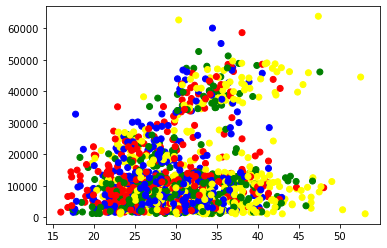

In [ ]:
#  (Sex vs [age vs charge])

fig, ax = plt.subplots()
colors = { 'southeast':'yellow','southwest':'green', 'northwest':'blue','northeast':'red'}
ax.scatter(data['bmi'], data['charges'], c=data['region'].apply(lambda x: colors[x]))
plt.show() #'age','sex','bmi','children','smoker','region','charges'

In [ ]:
# Create a spreadsheet-style pivot table as a DataFrame.

#'age','sex','bmi','children','smoker','region','charges'
data.pivot_table(values='charges', index='sex', columns='smoker', aggfunc='median')

smoker,no,yes
sex,,
female,7639.41745,28950.4692
male,6985.50695,36085.2190


In [ ]:

#from sklearn.preprocessing import MinMaxScaler  #(convert into 0 to 1)
#scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(data)
#scaled_data = pd.DataFrame(scaled_data, columns=['bmi', 'charges'])
#scaled_data.head()


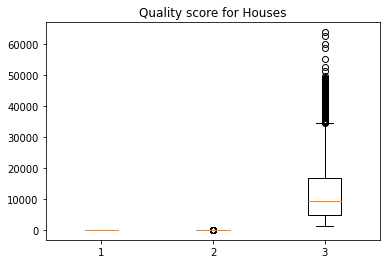

In [ ]:

# Create an axes instance
ax = plt.figure().add_subplot(111)
ax.set_title('Quality score for Houses')

# Create the boxplot
bp = ax.boxplot([data['age'], data['bmi'],  data['charges']])
#bp = ax.boxplot([data['age'], data['bmi'],  data['charges']])
#bp = ax.boxplot([data['age'], data['bmi'],  data['charges']])
#'age','sex','bmi','children','smoker','region','charges'

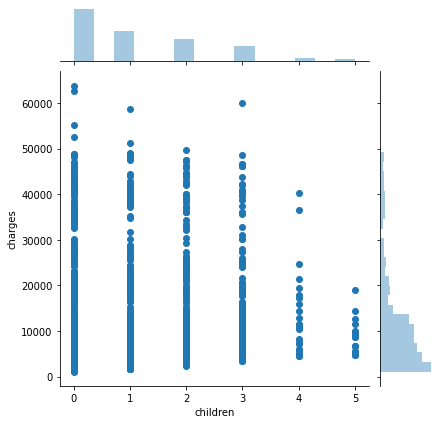

In [ ]:
import seaborn as sb
g=sb.jointplot(x="children",y="charges",data=data)
#'age','sex','bmi','children','smoker','region','charges'

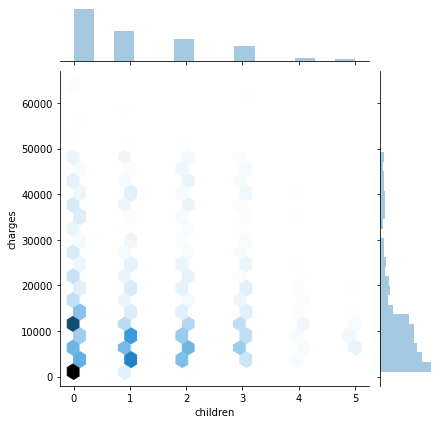

In [ ]:
g=sb.jointplot(x="children",y="charges",kind='hex',data=data)

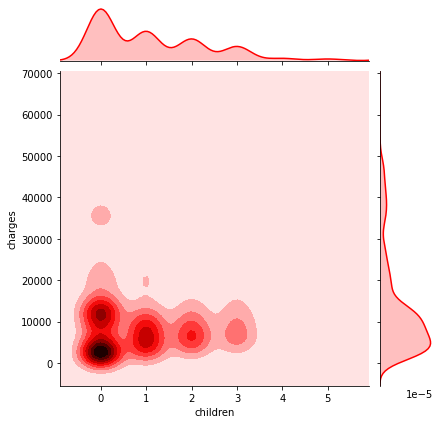

In [ ]:
g=sb.jointplot(x="children",y="charges",kind='kde',color='red',data=data)

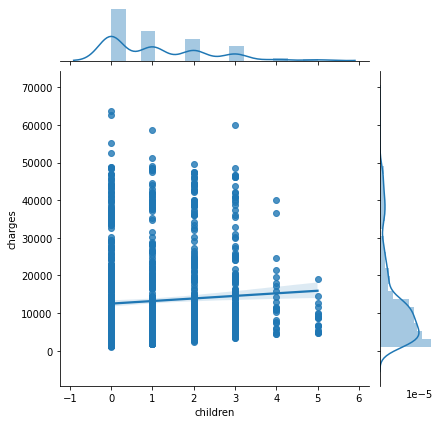

In [ ]:
g=sb.jointplot(x="children",y="charges",kind='reg',data=data)

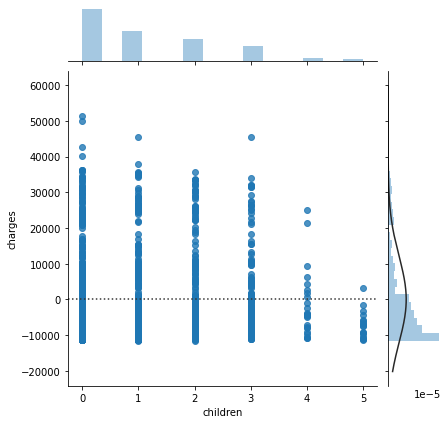

In [ ]:
g=sb.jointplot(x="children",y="charges",kind='resid',data=data)

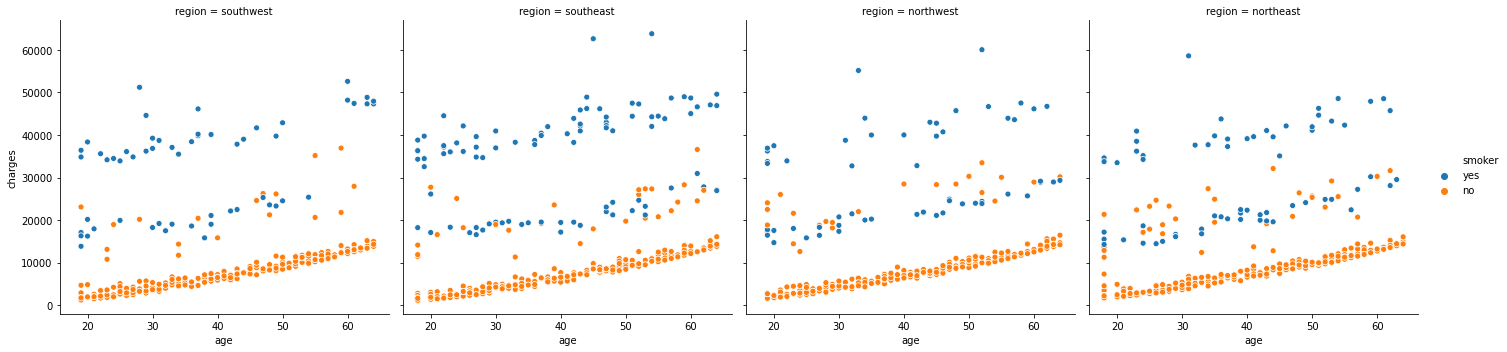

In [ ]:
g= sb.relplot(x="age", y="charges", hue="smoker", col="region", data=data)
#'age','sex','bmi','children','smoker','region','charges'

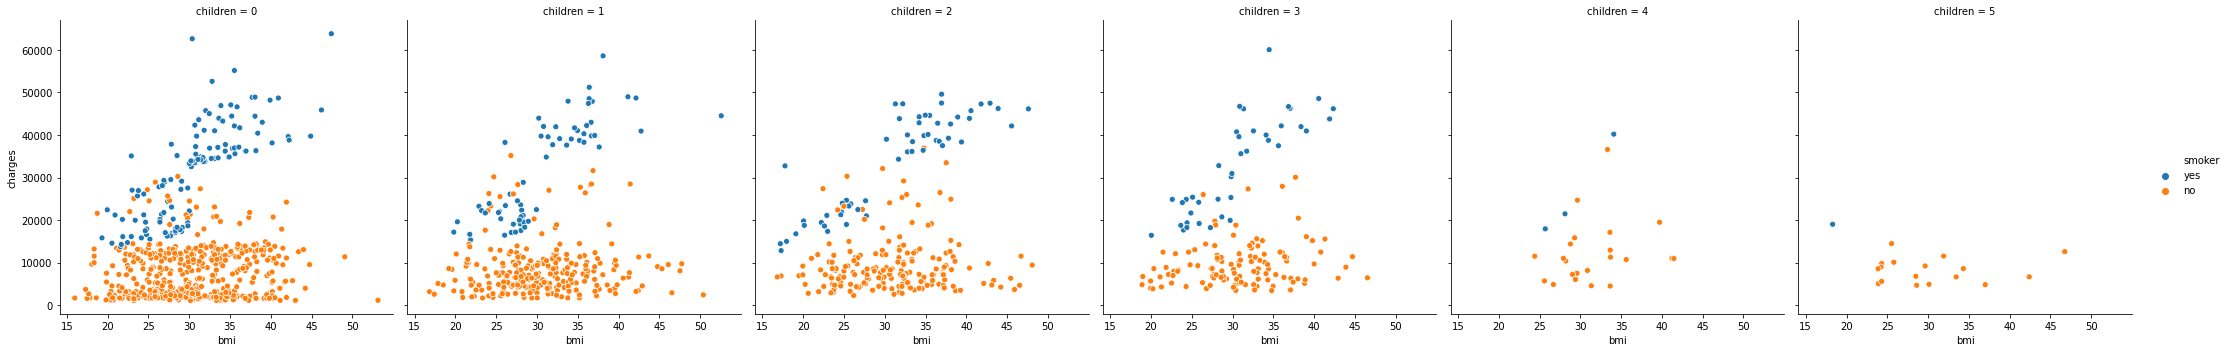

In [ ]:
g= sb.relplot(x="bmi", y="charges", hue="smoker", col="children", data=data)
#'age','sex','bmi','children','smoker','region','charges'

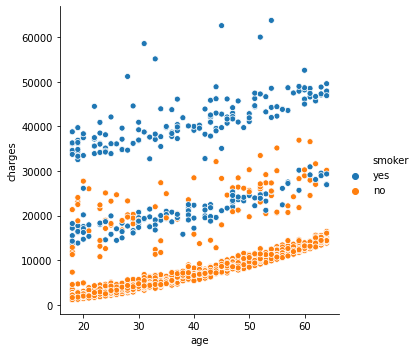

In [ ]:
g= sb.relplot(x="age", y="charges", hue="smoker", data=data)
#'age','sex','bmi','children','smoker','region','charges'

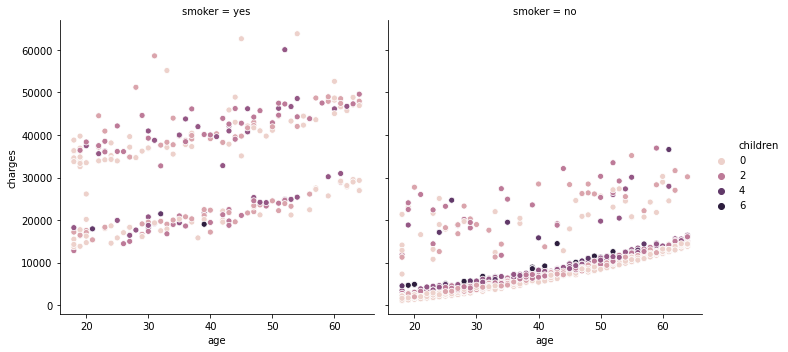

In [ ]:
g= sb.relplot(x="age", y="charges",hue="children", col="smoker", data=data)
#'age','sex','bmi','children','smoker','region','charges'

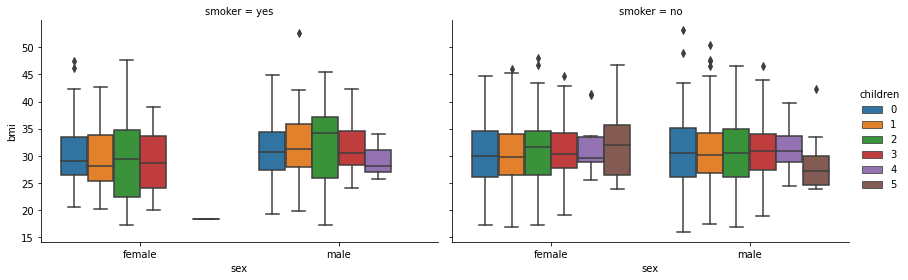

In [ ]:
g = sb.catplot(x="sex", y="bmi", hue="children", col="smoker", data=data, kind="box", height=4, aspect=1.5)
#'age','sex','bmi','children','smoker','region','charges'

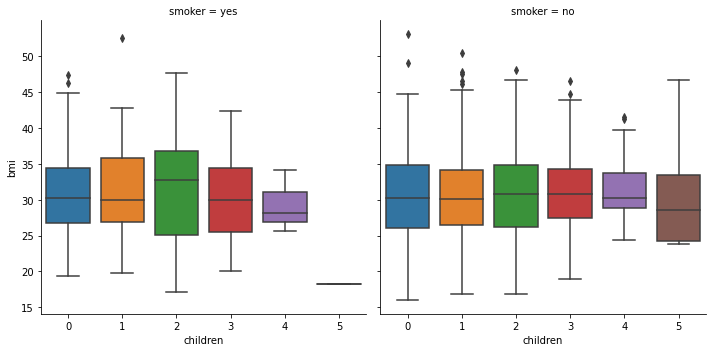

In [ ]:
g = sb.catplot(x="children", y="bmi",  col="smoker", data=data, kind="box")

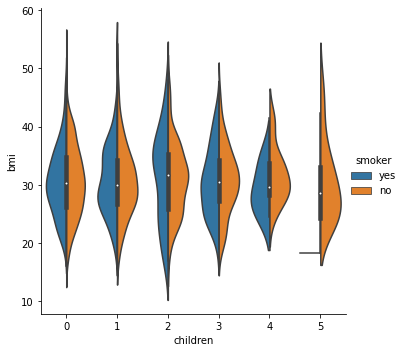

In [ ]:
g=sb.catplot(x="children", y="bmi", hue="smoker", kind="violin", split=True, data=data)
#'age','sex','bmi','children','smoker','region','charges'

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
pd.get_dummies(data['sex']).head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset = pd.get_dummies(data)   # Use one hot encoding for convert thr data catagorical to continuous
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
x = dataset.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]]   # Select (input data) for model
x=x.values                                      # Convert the data into a array
x

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [ ]:
y = dataset['charges']                         # Select (Target) for model
y=y.values                                     # Convert the data into a array
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
x.shape, y.shape                                           # Show the dimention of the data

((1338, 11), (1338,))

In [ ]:
from sklearn.model_selection import train_test_split      # Split the data into train and test dataset
train_X,test_X,train_Y,test_Y = train_test_split(x,y,test_size=.20,random_state =101) 

In [ ]:
from sklearn.linear_model import LinearRegression          # Call linear regression library 
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regression = LinearRegression(fit_intercept=True,normalize=False) # Set the parameters for 

In [ ]:
Train = regression.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept- :',regression.intercept_)

Intercept- : -1006.3437738449011


In [ ]:
Test_Pred = learner.predict(test_X)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(Test_Pred,test_Y)) # Find mean absolute error

Mean Absolute Error: 4036.874028358432


In [ ]:
print('Mean Squared Error:',mean_squared_error(Test_Pred,test_Y))    # 

Mean Squared Error: 33748393.370595865


In [ ]:
print('Root Of Mean Squared Error:',np.sqrt(mean_squared_error(Test_Pred,test_Y)))  # 

Root Of Mean Squared Error: 5809.336741022667


In [ ]:
print("Training set score:{:.3f}".format(trainer.score(train_X,train_Y)))
print("Testing set score:{:.3f}".format(trainer.score(test_X,test_Y))) 

Training set score:0.748
Testing set score:0.761
